In [1]:
#Importing all the library
import pandas as pd
import numpy as np
!pip install lxml
import lxml
!pip3 install lxml
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#Reading the table from the url
url='https://www.motorbeam.com/february-2022-car-sales-maruti-swift-leads-dzire-comes-second/'
df_car=pd.read_html(url)[0]


In [3]:
#Checking the heading
df_car.head()

,Rank,OEM,Model,Feb ’22 Sales,Feb ’21 Sales,YoY Growth
0,1,Maruti,Swift,19202,20264,-5%
1,2,Maruti,Dzire,17438,11901,47%
2,3,Maruti,Wagon R,14669,18728,-22%
3,4,Maruti,Baleno,12570,20070,-37%
4,5,Tata,Nexon,12259,7929,55%


In [4]:
#checking the null value
df_car.isnull().sum()

Rank             0
OEM              0
Model            0
Feb ’22 Sales    0
Feb ’21 Sales    0
YoY Growth       0
dtype: int64

In [5]:
#Checking th einformation of datatypes
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           25 non-null     int64 
 1   OEM            25 non-null     object
 2   Model          25 non-null     object
 3   Feb ’22 Sales  25 non-null     int64 
 4   Feb ’21 Sales  25 non-null     object
 5   YoY Growth     25 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.3+ KB


In [6]:
#To find the objects and Int64 columns
s=[]

for i in df_car.columns:
    if df_car[i].dtype =='O':
        s.append(i)
    else:
        print(i)


Rank
Feb ’22 Sales


In [7]:

#Renaming the columns 
df_car.rename(columns={"Feb ’21 Sales": "Feb_21_Sales", "Feb ’22 Sales": "Feb_22_Sales"},inplace=True)

In [8]:
#Checking the dataframe after the renaming
df_car.head()

,Rank,OEM,Model,Feb_22_Sales,Feb_21_Sales,YoY Growth
0,1,Maruti,Swift,19202,20264,-5%
1,2,Maruti,Dzire,17438,11901,47%
2,3,Maruti,Wagon R,14669,18728,-22%
3,4,Maruti,Baleno,12570,20070,-37%
4,5,Tata,Nexon,12259,7929,55%


In [9]:
#Checking the columns
df_car.columns

Index(['Rank', 'OEM', 'Model', 'Feb_22_Sales', 'Feb_21_Sales', 'YoY Growth'], dtype='object')

In [10]:
#Converting the datatypes to Int
df_car.Rank=df_car.Rank.astype('int64')

In [11]:
df_car.Feb_22_Sales=df_car.Feb_22_Sales.astype('int64')

In [12]:
#Replacing the null vakues in the column
df_car.Feb_21_Sales.replace('–',"0",inplace=True)

In [13]:
#Converting the data types to int
df_car.Feb_21_Sales=df_car.Feb_21_Sales.astype('int64')

In [14]:
#Checking the data types
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          25 non-null     int64 
 1   OEM           25 non-null     object
 2   Model         25 non-null     object
 3   Feb_22_Sales  25 non-null     int64 
 4   Feb_21_Sales  25 non-null     int64 
 5   YoY Growth    25 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.3+ KB


In [15]:
#Calcuating the yoy GROWTH 
df_YOY_Growth=round((df_car['Feb_22_Sales']-df_car['Feb_21_Sales'])/(df_car['Feb_21_Sales']) * 100,2)

In [16]:
#Checking the dataframe 
df_YOY_Growth.head()

0    -5.24
1    46.53
2   -21.67
3   -37.37
4    54.61
dtype: float64

In [17]:
#Concate the YOY-growth with df_car
df_car=pd.concat([df_car,df_YOY_Growth],axis=1,names="YOY_Growth")

In [18]:
#Renaming the column
df_car.rename(columns={0: "YOY_Growth"},inplace=True)

In [19]:
#Checking the heding
df_car.head()

,Rank,OEM,Model,Feb_22_Sales,Feb_21_Sales,YoY Growth,YOY_Growth
0,1,Maruti,Swift,19202,20264,-5%,-5.24
1,2,Maruti,Dzire,17438,11901,47%,46.53
2,3,Maruti,Wagon R,14669,18728,-22%,-21.67
3,4,Maruti,Baleno,12570,20070,-37%,-37.37
4,5,Tata,Nexon,12259,7929,55%,54.61


In [20]:
#Drop the unnecessary column
df_car.drop(['YoY Growth'],axis=1,inplace=True)

In [21]:
df_car.head()

,Rank,OEM,Model,Feb_22_Sales,Feb_21_Sales,YOY_Growth
0,1,Maruti,Swift,19202,20264,-5.24
1,2,Maruti,Dzire,17438,11901,46.53
2,3,Maruti,Wagon R,14669,18728,-21.67
3,4,Maruti,Baleno,12570,20070,-37.37
4,5,Tata,Nexon,12259,7929,54.61


In [22]:
#Replacing th =e inf value with 0
df_car.replace([np.inf, -np.inf], np.nan, inplace=True)

In [23]:
#Checking the head
df_car.head(10)

,Rank,OEM,Model,Feb_22_Sales,Feb_21_Sales,YOY_Growth
0,1,Maruti,Swift,19202,20264,-5.24
1,2,Maruti,Dzire,17438,11901,46.53
2,3,Maruti,Wagon R,14669,18728,-21.67
3,4,Maruti,Baleno,12570,20070,-37.37
4,5,Tata,Nexon,12259,7929,54.61
5,6,Maruti,Ertiga,11649,9774,19.18
6,7,Maruti,Alto,11551,16919,-31.73
7,8,Mahindra,Bolero,11045,4843,128.06
8,9,Hyundai,Venue,10212,11224,-9.02
9,10,Maruti,Celerio,9896,6214,59.25


C:\Users\arabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


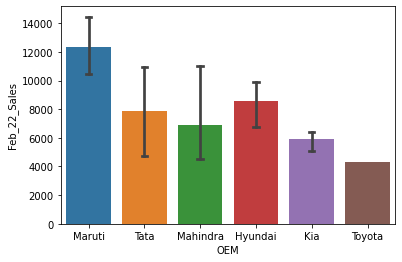

In [24]:
#Model vs Sales 22
sns.barplot('OEM','Feb_22_Sales',data=df_car,capsize=.1,errwidth=None)
plt.rcParams['figure.figsize'] = (18, 10)

In [25]:
#Finding top ranking company where sales are highest
df_TOP=(df_car.groupby('OEM').size().sort_values(ascending=False))

In [26]:
#Renaming column 
df_TOP=df_TOP.reset_index()
df_TOP.rename(columns={0:"Count"},inplace=True)

In [27]:
#Checking after the renaming 
df_TOP

,OEM,Count
0,Maruti,10
1,Hyundai,4
2,Tata,4
3,Kia,3
4,Mahindra,3
5,Toyota,1


C:\Users\arabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


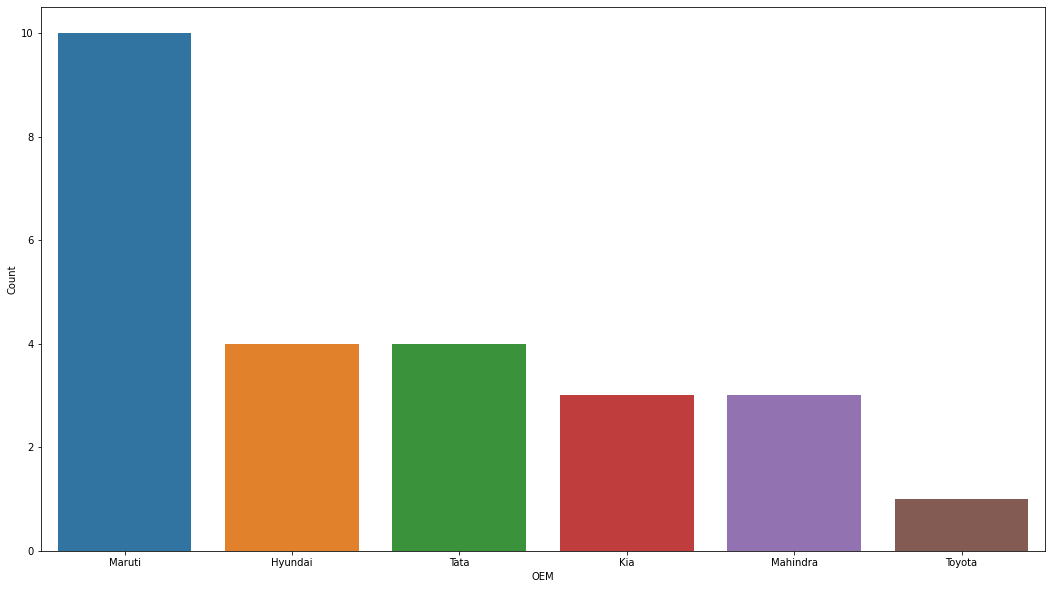

In [28]:
#TOP SALES COMPANY
sns.barplot (df_TOP['OEM'],df_TOP['Count'],capsize=2)
plt.rcParams['figure.figsize'] = (18, 10)
#MARUTI IS THE HAVING HIGHEST SALES

<AxesSubplot:>

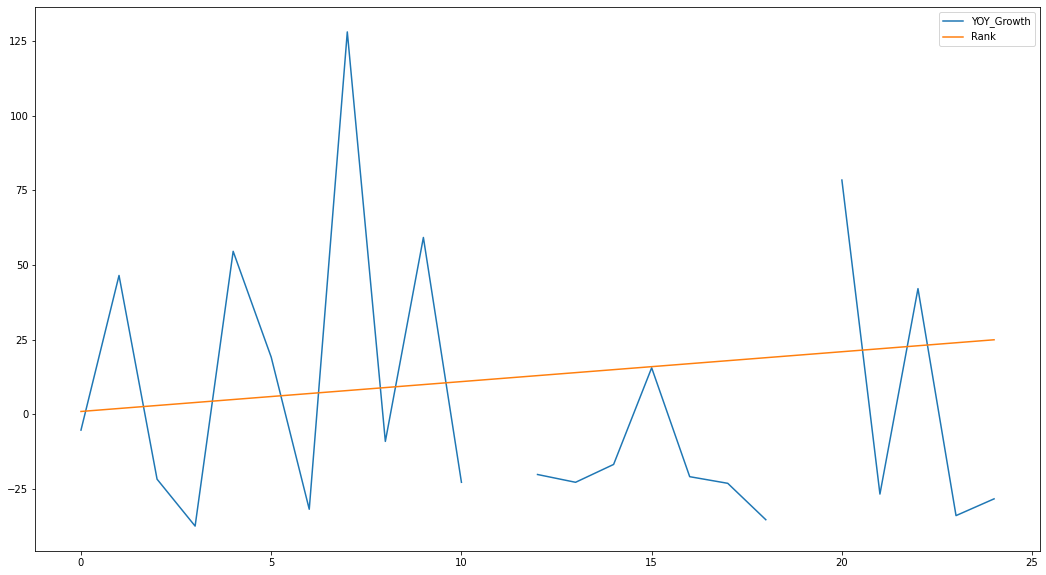

In [29]:
#Rank VS YOY GROWTH
df_car[['YOY_Growth','Rank']].plot.line()

<AxesSubplot:>

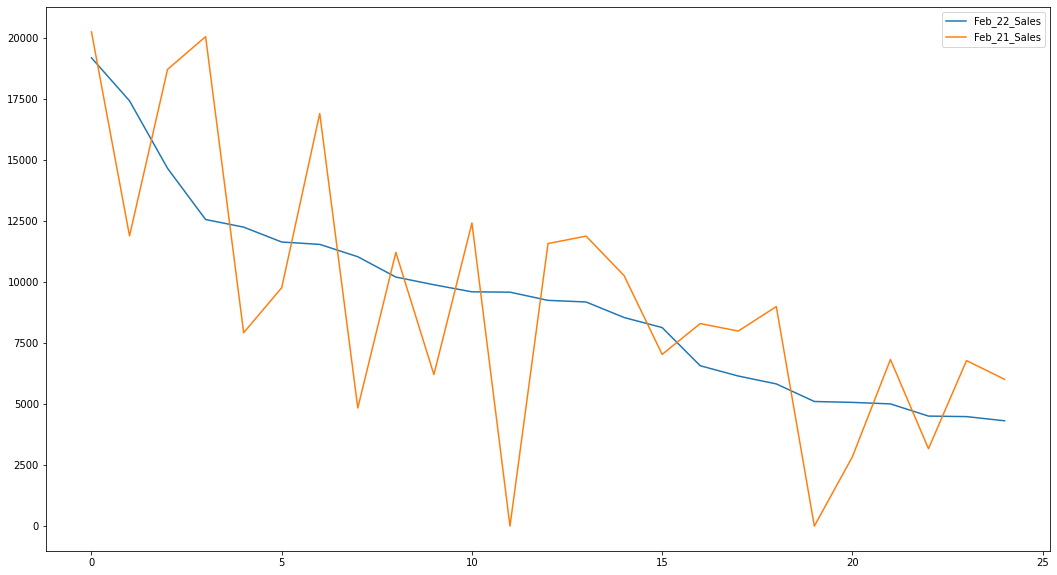

In [30]:
#21 SALES VS 22 SALES
df_car[['Feb_22_Sales','Feb_21_Sales']].plot.line()
#FEB 2021 SALES IS MORE AS COMPARE TO 2022 FEB

C:\Users\arabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OEM', ylabel='Feb_21_Sales'>

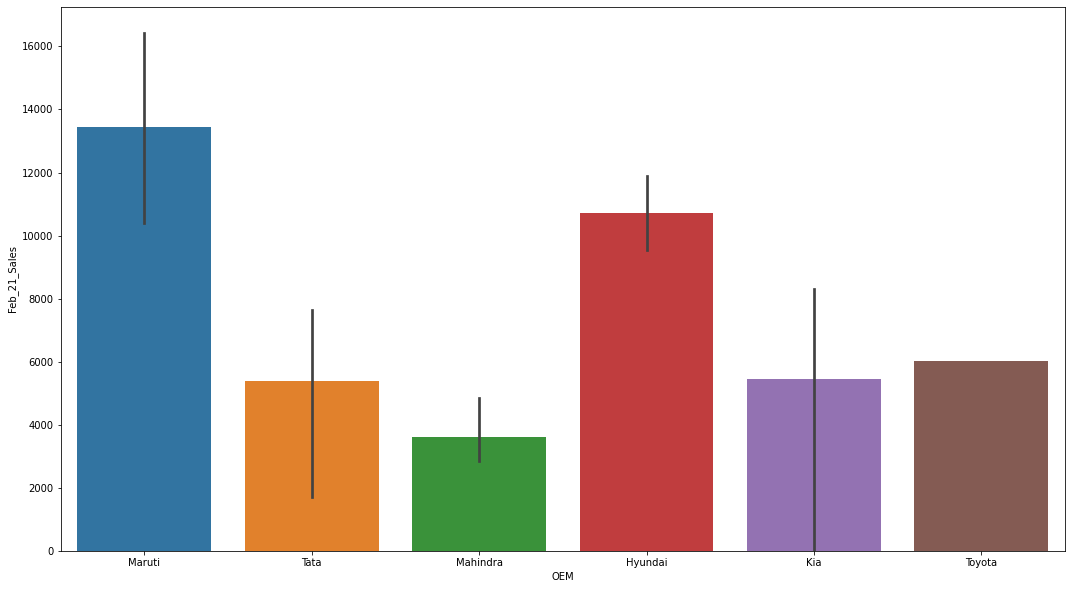

In [31]:
#FEB 21 SALES VS OEM
sns.barplot('OEM','Feb_21_Sales',data=df_car,orient="v")
#Maruti is the highest in sales in FEB 21 SALES

In [32]:
#Finding top model where sales are highest
df_model=df_car.groupby('Model')['Feb_21_Sales'].sum().sort_values(ascending=False).head(5)

In [33]:
#Checking the dataframe& reset the index
df_model=df_model.reset_index()

In [34]:
#Checking the dataframe
df_model

,Model,Feb_21_Sales
0,Swift,20264
1,Baleno,20070
2,Wagon R,18728
3,Alto,16919
4,Creta,12428


C:\Users\arabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Feb_21_Sales'>

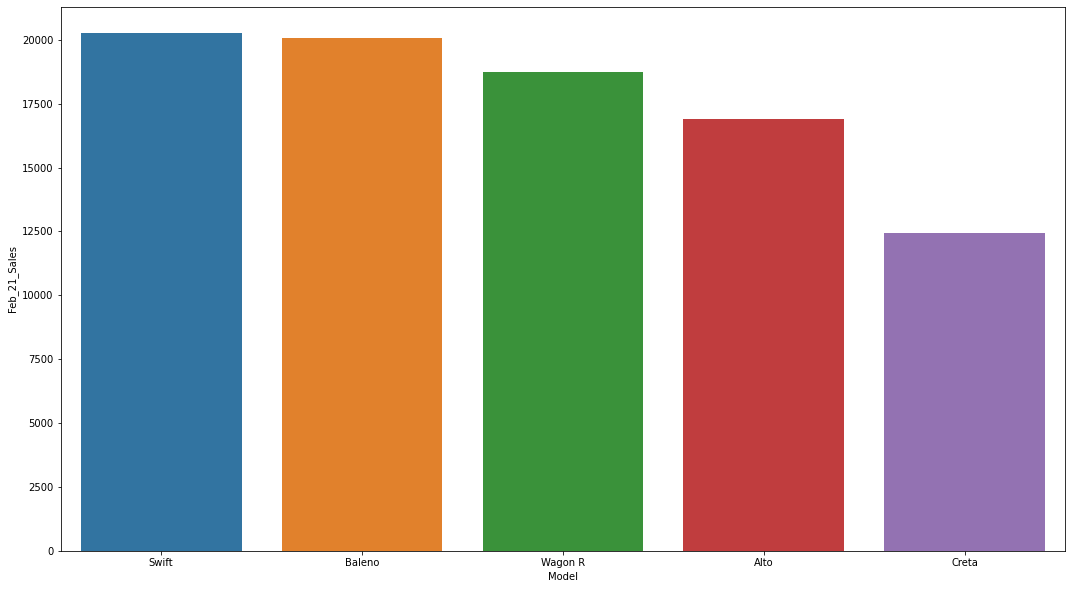

In [35]:
#Model Vs FEB 21 SALES(TOP MODEL SALES)
sns.barplot('Model','Feb_21_Sales',data=df_model)
#Swift is the highest in sales (FEB 21) 

In [47]:
#YOY GROWTH & MODEL 
df_YOY=df_car.groupby('Model')['YOY_Growth'].sum().sort_values(ascending=False).reset_index()

In [48]:
#CHECKING THE DATAFRMAME
df_YOY.head()

,Model,YOY_Growth
0,Bolero,128.06
1,Thar,78.47
2,Celerio,59.25
3,Nexon,54.61
4,Dzire,46.53


C:\Users\arabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='YOY_Growth'>

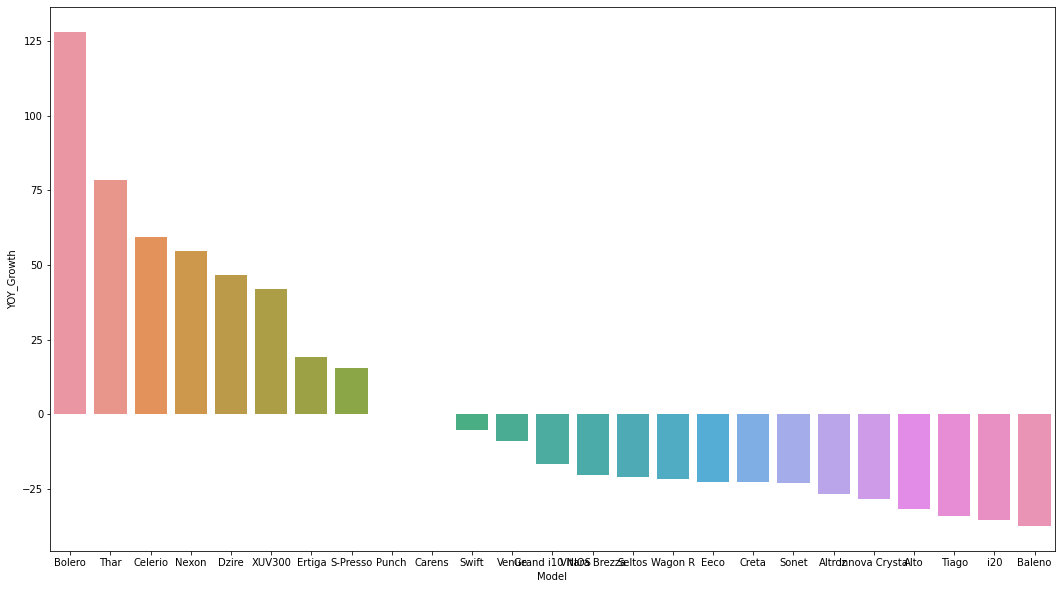

In [61]:
#MODEL VS YOY GROWTH
sns.barplot('Model','YOY_Growth',data=df_YOY,capsize=.6)
#Bolero is highest sell & Baleno is the lowest in the YOY growth 

In [85]:
df_model.head(2)

,OEM,Model,Feb_22_Sales
0,Maruti,Swift,19202
1,Maruti,Dzire,17438


In [84]:
df_model=df_car.groupby(['OEM','Model'])['Feb_22_Sales'].sum().sort_values(ascending=False).reset_index()

C:\Users\arabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Feb_22_Sales'>

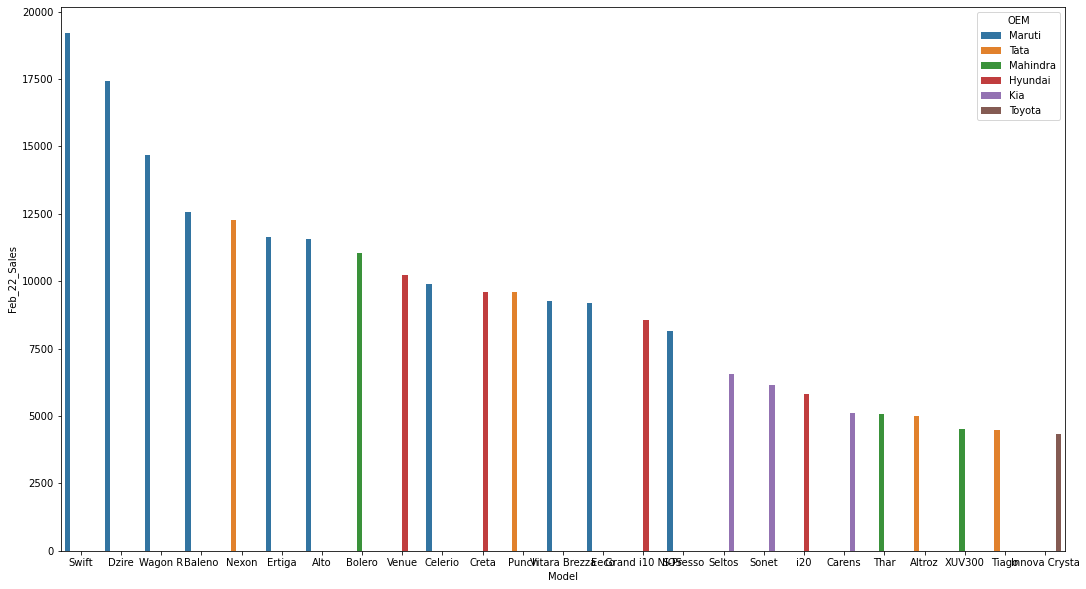

In [94]:
#MODEL VS OEM VS FEB 21 SALES 
sns.barplot('Model','Feb_22_Sales',hue='OEM',data=df_model,capsize=9)

<AxesSubplot:>

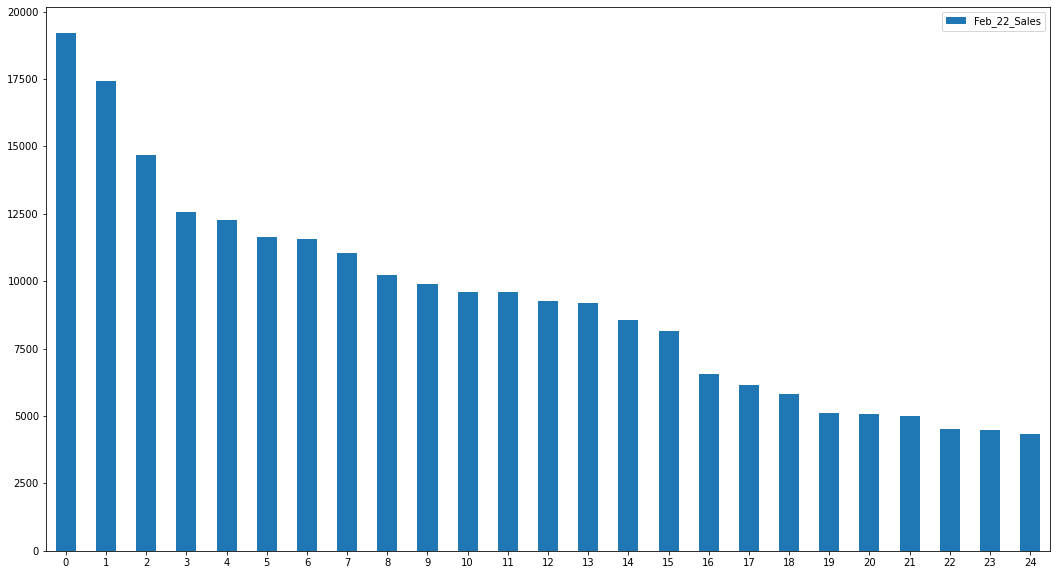

In [100]:
#sns.barplot('Model','Feb_22_Sales',hue='OEM',data=df_model,capsize=9)
df_model.plot.bar(rot=0)


<AxesSubplot:>

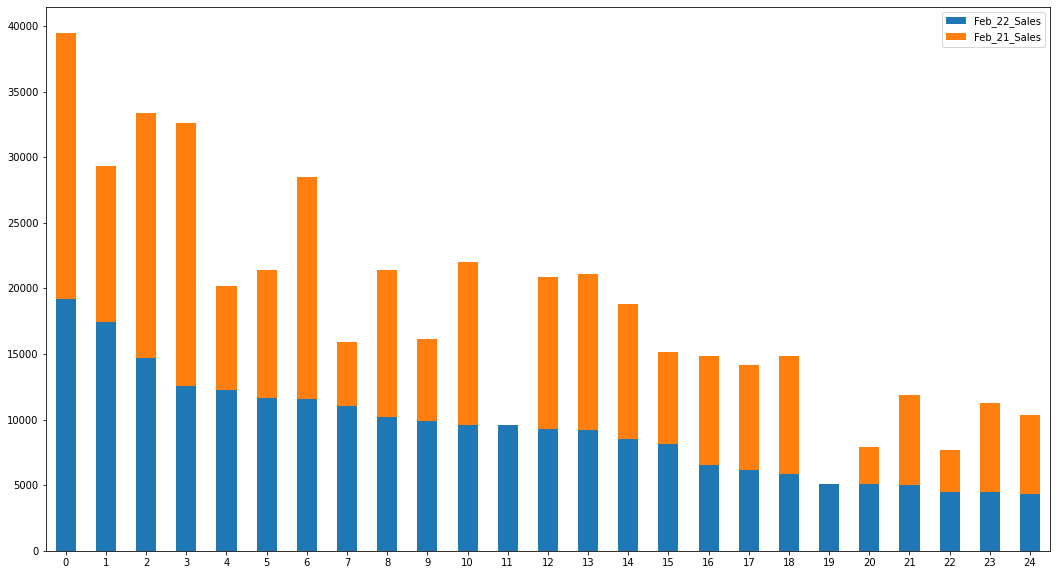

In [114]:
df_car[['OEM','Feb_22_Sales','Feb_21_Sales']].plot.bar(stacked=True,rot=0)
#df_car[['Feb_22_Sales','Feb_21_Sales']].set_index(df_car['OEM']).plot.bar(stacked=True,rot=0)